# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [37]:
# import libraries here
import pandas as pd
import numpy as np

In [59]:
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [6]:
# your answer here
temp.dtypes

# City and State are objects (strings), and temperature is a float number

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [10]:
# your answer here
ny_state = temp.loc[temp['State']=='New York']
ny_state

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [13]:
# your answer here
ny_state.Temperature.mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [18]:
# your answer here
temp.loc[temp.Temperature > 15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [15]:
# your answer here
temp.loc[temp.Temperature > 15]['City']

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [19]:
# your answer here
temp.loc[(temp.Temperature > 15) & (temp.Temperature < 20)]['City']

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [47]:
# your answer here
states = temp.groupby(['State']).mean()
states['Stdv'] = temp.groupby(['State']).std()
print(states)

             Temperature      Stdv
State                             
Connecticut    15.833333  1.964186
New Jersey     21.111111  1.571348
New York       10.740741  8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [48]:
# your answer here
employee = pd.read_csv('employee.csv')

#### Explore the data types of the Employees dataframe. Comment your results

In [56]:
# your answer here
employee.dtypes
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

array([[<AxesSubplot:title={'center':'Years'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

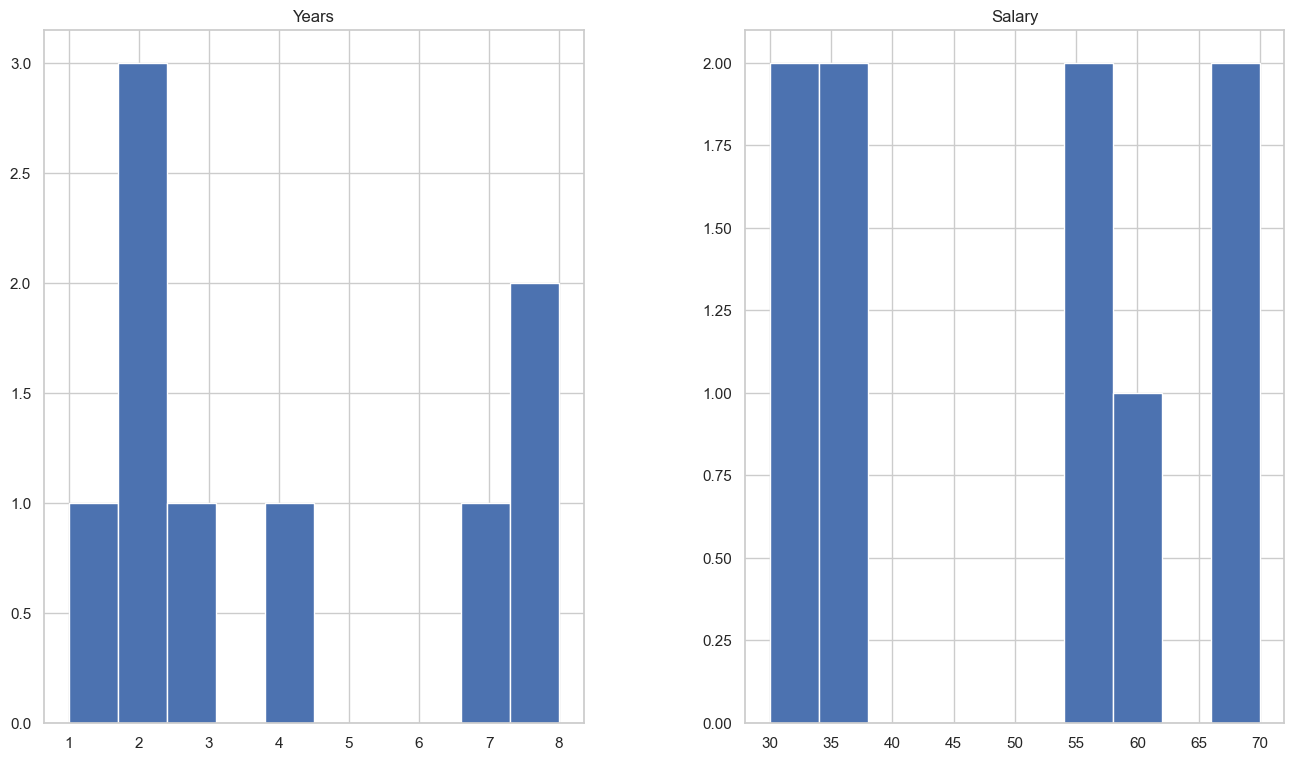

In [60]:
# your answer here
employee.hist()

#### What's the average salary in this company?

In [62]:
# your answer here
mean_salary = employee.Salary.mean()
mean_salary

48.888888888888886

#### What's the highest salary?

In [63]:
# your answer here
max_salary = employee.Salary.max()
max_salary

70

#### What's the lowest salary?

In [64]:
# your answer here
min_salary = employee.Salary.min()
min_salary

30

#### Who are the employees with the lowest salary?

In [66]:
# your answer here
employee.loc[employee.Salary == 30]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [67]:
# your answer here
employee.loc[employee.Name == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [70]:
# your answer here
employee.loc[employee.Name == 'David'].Salary

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [71]:
# your answer here
employee.loc[employee.Title == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [73]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [75]:
# your answer here- 2nd method
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [76]:
# your answer here
employee.loc[(employee.Title == 'associate') & (employee.Salary > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [79]:
# your answer here
employee.groupby('Years').mean().Salary

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [80]:
# your answer here
employee.groupby('Title').mean().Salary

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<AxesSubplot:>

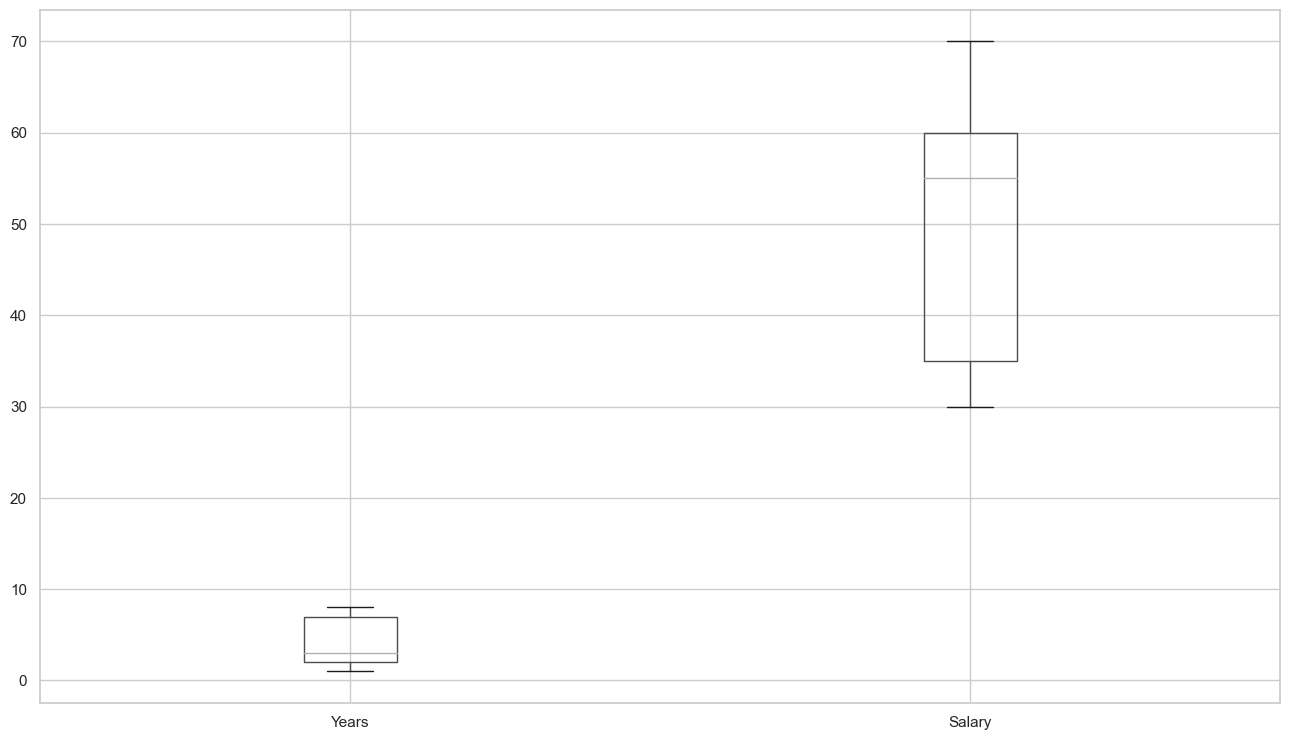

In [85]:
# draw boxplot here
employee.boxplot()

In [95]:
# print first quartile here
employee.quantile(.25)

Years      2.0
Salary    35.0
Name: 0.25, dtype: float64

In [96]:
# print third quartile here
employee.quantile(.75)

Years      7.0
Salary    60.0
Name: 0.75, dtype: float64

#### Is the mean salary per gender different?

In [97]:
# your answer here
employee.groupby('Gender').mean().Salary

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [98]:
# your answer here
employee.groupby('Department').describe()

Years                                                Salary         \
           count      mean       std  min   25%  50%   75%  max  count   mean   
Department                                                                      
HR           3.0  4.666667  3.055050  2.0  3.00  4.0  6.00  8.0    3.0  45.00   
IT           4.0  4.500000  3.511885  1.0  1.75  4.5  7.25  8.0    4.0  48.75   
Sales        2.0  2.500000  0.707107  2.0  2.25  2.5  2.75  3.0    2.0  55.00   

                                                      
                  std   min    25%   50%   75%   max  
Department                                            
HR          21.794495  30.0  32.50  35.0  52.5  70.0  
IT          19.311050  30.0  33.75  47.5  62.5  70.0  
Sales        0.000000  55.0  55.00  55.0  55.0  55.0

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [102]:
# your answer here


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [107]:
# your answer here
orders = pd.read_csv('Orders.zip', compression='zip', index_col=0)

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [108]:
# your answer here
orders

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [110]:
# your answer here
orders.describe()

,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [111]:
# your answer here
orders.UnitPrice.mean()

3.116174480549152

#### What were the highest and lowest purchase prices? 

In [112]:
# your answer here
orders.UnitPrice.max()

8142.75

In [113]:
# your answer here
orders.UnitPrice.min()

0.0

#### Select all the customers we have in Spain

In [114]:
# your answer here
orders.loc[orders.Country == 'Spain']

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [133]:
# your answer here
orders.loc[orders.Country == 'Spain'].CustomerID.unique().shape[0]

30

#### Select all the customers who have bought more than 50 items ?

In [137]:
# your answer here
orders.loc[orders.Quantity > 50].sort_values(by='Quantity', ascending=False)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
540421,581483,23843,2011,12,5,9,"paper craft , little birdie",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.60
61619,541431,23166,2011,1,2,10,medium ceramic top storage jar,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.60
502122,578841,84826,2011,11,5,15,asstd design 3d paper stickers,12540,2011-11-25 15:57:00,0.00,13256,United Kingdom,0.00
421632,573008,84077,2011,10,4,12,world war 2 gliders asstd designs,4800,2011-10-27 12:26:00,0.21,12901,United Kingdom,1008.00
206121,554868,22197,2011,5,5,10,small popcorn holder,4300,2011-05-27 10:52:00,0.72,13135,United Kingdom,3096.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270680,560580,23245,2011,7,2,15,set of 3 regency cake tins,52,2011-07-19 15:23:00,4.15,14088,United Kingdom,215.80
270734,560580,22568,2011,7,2,15,feltcraft cushion owl,52,2011-07-19 15:23:00,3.39,14088,United Kingdom,176.28
291834,562521,20897,2011,8,5,12,vintage notebook paris days,51,2011-08-05 12:48:00,2.55,17457,United Kingdom,130.05
436433,574143,47518F,2011,11,4,11,icon placemat pop art elvis,51,2011-11-03 11:27:00,0.12,18041,United Kingdom,6.12


#### Select orders from Spain that are above 50 items

In [141]:
# your answer here
spain = orders.loc[(orders.Country == 'Spain') & (orders.Quantity > 50)]
spain.shape

(39, 13)

#### Select all free orders

In [143]:
# your answer here
free = orders.loc[orders.UnitPrice == 0]
free.shape

(40, 13)

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [147]:
# your answer here
orders.loc[orders.Description.str.contains('lunch bag')]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [149]:
# your answer here
orders.loc[(orders.Description.str.contains('lunch bag')) & (orders.year == 2011)]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

C:\Users\franc\anaconda3\envs\Ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount_spent', ylabel='count'>

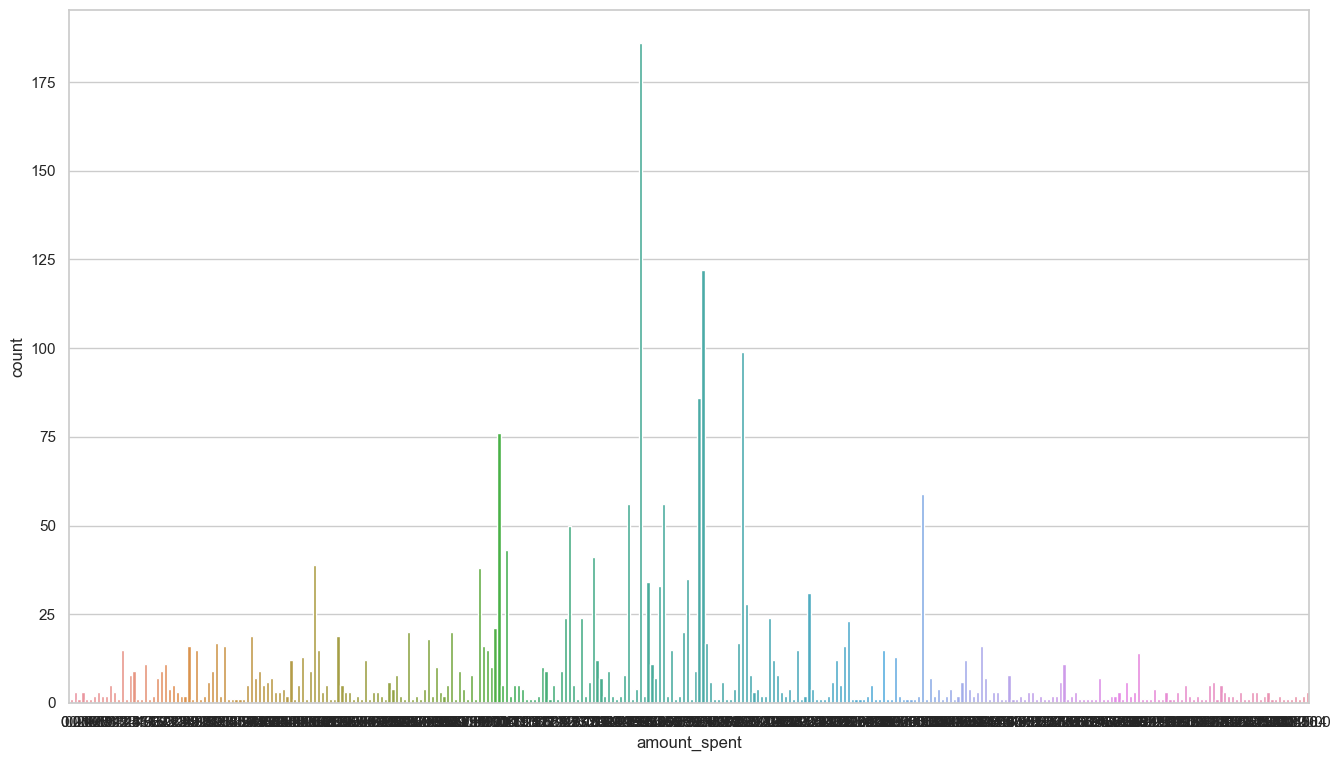

In [160]:
# your answer here
spain = orders.loc[orders.Country == 'Spain']
sns.countplot(spain.amount_spent)

#### Select all orders made in the month of August

In [162]:
# your answer here
orders.loc[orders.month == 8]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [168]:
# your answer here
orders.loc[orders.month == 8].groupby('Country').count()['Quantity']

Country
Australia            107
Austria               88
Belgium              194
Canada                 5
Channel Islands      140
Denmark               16
EIRE                 593
Finland               61
France               569
Germany              795
Iceland               22
Israel               171
Italy                 95
Malta                 55
Netherlands          280
Norway                77
Poland                17
Portugal              41
Spain                252
Sweden                40
Switzerland          267
United Kingdom     23105
Unspecified           23
Name: Quantity, dtype: int64

#### What's the  average amount of money spent by country

In [186]:
# your answer here
orders.groupby('Country').mean()['amount_spent']

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [193]:
# your answer here
orders.loc[orders.UnitPrice == orders.UnitPrice.max()]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [190]:
# your answer here
orders.groupby('year').mean()['amount_spent']

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64